In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kahului us
lata sb
albany au
ye mm
albany au
provideniya ru
barentsburg sj
airai pw
punta arenas cl
punta arenas cl
tilichiki ru
cherskiy ru
port alfred za
albany au
ayan ru
port alfred za
srednekolymsk ru
cherskiy ru
sibolga id
te anau nz
asau tv
constitucion mx
havelock us
deputatskiy ru
nantucket us
lagoa pt
vaini to
salinopolis br
aberdeen us
sentyabrskiy ru
lingao cn
daura ng
hermanus za
punta arenas cl
atuona pf
albany au
shiyan cn
qaanaaq gl
san carlos mx
jasper ca
punta arenas cl
irgakly ru
guerrero negro mx
kampot kh
rawson ar
dunedin nz
bandarbeyla so
isla vista us
new norfolk au
axim gh
avarua ck
noyabrsk ru
avarua ck
mlonggo id
taolanaro mg
punta arenas cl
khatanga ru
chokurdakh ru
vaini to
tuktoyaktuk ca
hobart au
sao filipe cv
punta arenas cl
muros es
chuy uy
albania co
puerto ayora ec
severo-kurilsk ru
bandarbeyla so
mae ramat th
kismayo so
oistins bb
taolanaro mg
mataura pf
hermanus za
uk ru
ushuaia ar
dikson ru
makat kz
ushuaia ar
kruisfontein za
kapaa us
rikitea pf
no

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ye
City not found. Skipping...
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | tilichiki
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | ayan
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | sibolga
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | asau
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | havelock
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | va

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,80.83,78,100,15.99,US,2021-07-17 18:54:44
1,Lata,40.1629,-8.3327,74.35,49,0,6.53,PT,2021-07-17 18:59:27
2,Albany,42.6001,-73.9662,85.15,97,100,4.12,US,2021-07-17 18:59:27
3,Provideniya,64.3833,-173.3000,45.86,97,100,6.40,RU,2021-07-17 18:59:27
4,Airai,-8.9266,125.4092,56.62,64,99,2.13,TL,2021-07-17 18:59:28
5,Punta Arenas,-53.1500,-70.9167,37.51,93,75,9.22,CL,2021-07-17 18:59:28
6,Tilichiki,60.4667,166.1000,49.98,91,100,3.04,RU,2021-07-17 18:59:28
7,Cherskiy,68.7500,161.3000,58.08,79,100,5.93,RU,2021-07-17 18:59:29
8,Port Alfred,-33.5906,26.8910,57.81,73,0,7.96,ZA,2021-07-17 18:59:29
9,Ayan,56.4500,138.1667,62.80,63,83,13.00,RU,2021-07-17 18:59:29


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", 
                    "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-07-17 18:54:44,20.8947,-156.4700,80.83,78,100,15.99
1,Lata,PT,2021-07-17 18:59:27,40.1629,-8.3327,74.35,49,0,6.53
2,Albany,US,2021-07-17 18:59:27,42.6001,-73.9662,85.15,97,100,4.12
3,Provideniya,RU,2021-07-17 18:59:27,64.3833,-173.3000,45.86,97,100,6.40
4,Airai,TL,2021-07-17 18:59:28,-8.9266,125.4092,56.62,64,99,2.13
...,...,...,...,...,...,...,...,...,...
577,Los Llanos De Aridane,ES,2021-07-17 19:02:35,28.6585,-17.9182,69.55,78,20,16.11
578,La Ronge,CA,2021-07-17 19:02:35,55.1001,-105.2842,56.59,57,100,9.46
579,Ciudad Bolivar,VE,2021-07-17 18:58:03,8.1222,-63.5497,89.28,47,51,6.04
580,Okha,RU,2021-07-17 19:02:36,53.5739,142.9478,57.51,91,6,12.91


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1626548556.82585

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

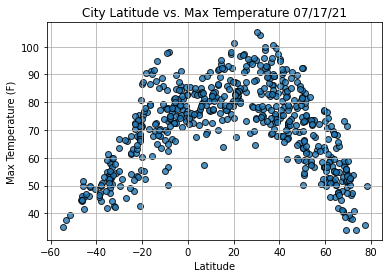

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

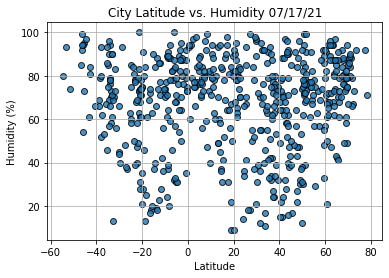

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

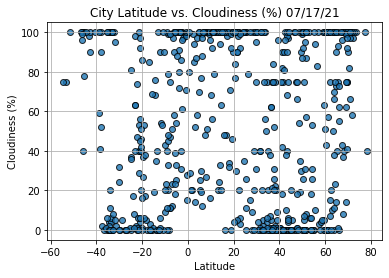

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

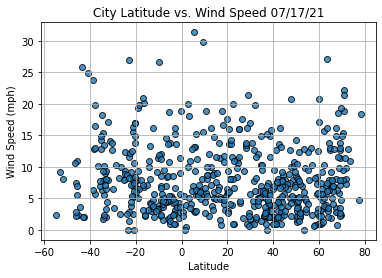

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Asau
Country                        RO
Date          2021-07-17 18:59:31
Lat                       46.4333
Lng                          26.4
Max Temp                     75.4
Humidity                       73
Cloudiness                      0
Wind Speed                   3.87
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
577     True
578     True
579     True
580     True
581     True
Name: Lat, Length: 582, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-07-17 18:54:44,20.8947,-156.4700,80.83,78,100,15.99
1,Lata,PT,2021-07-17 18:59:27,40.1629,-8.3327,74.35,49,0,6.53
2,Albany,US,2021-07-17 18:59:27,42.6001,-73.9662,85.15,97,100,4.12
3,Provideniya,RU,2021-07-17 18:59:27,64.3833,-173.3000,45.86,97,100,6.40
6,Tilichiki,RU,2021-07-17 18:59:28,60.4667,166.1000,49.98,91,100,3.04


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

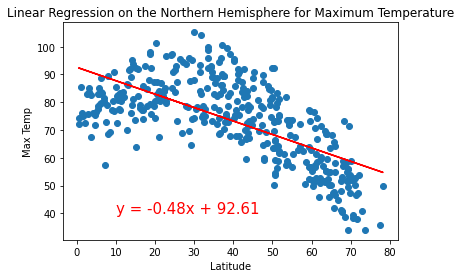

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp',(10,40))


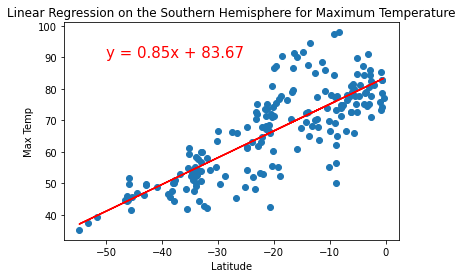

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp',(-50,90))


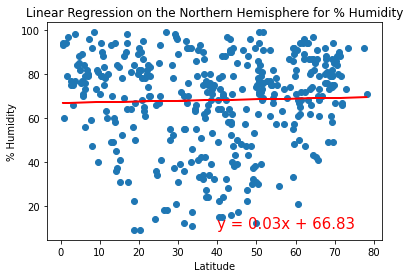

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(40,10))

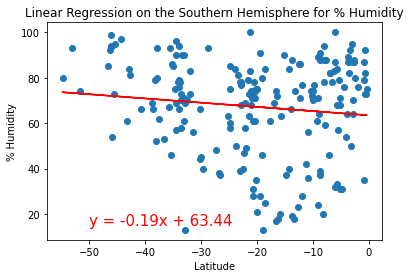

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-50,15))


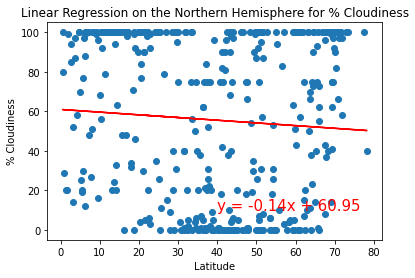

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(40,10))

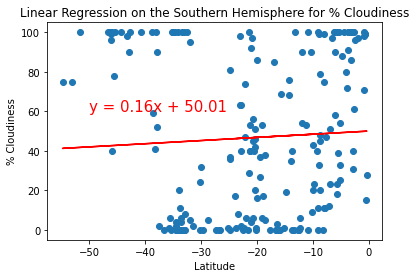

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-50,60))

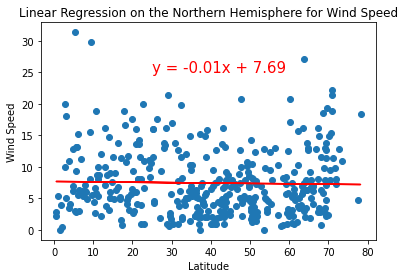

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Wind Speed', 'Wind Speed',(25,25))

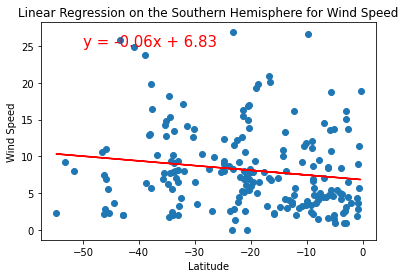

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-50,25))